## Employee Satisfaction Analysis

#### Abstract

The goal of this analysis is to primarily analyze what factors within the workplace contributed to the self-reported satisfaction values. 

#### Questions: 

1. Did those who have a work accident have bad performance results?
2. Does having a work accident influence job satisfaction?
3. Is there a correlation between Satisfaction Level and Work Performance?
4. Is there a correlation between Satisfaction Level and average monthly hours?
5. Is there a correlation between Work Performance and average monthly hours?
6. How does Satisfaction Level change with the Number of Concurrent Projects?
7. How does this relation change with regards to Seniority (Entry Level, Junior, Senior)?
8. Does satisfaction levels change with Department and Job Type?
9. Which departments pay the most in general?
10. Do satisfaction levels differ between salary levels?

Source: https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('archive\\Employee Attrition.csv')

df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


## Data Cleaning

#### Dropping NA-records (and duplicates, but there are none)

In [4]:
df[df.duplicated(keep=False)]

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
12783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

#### Removing Unneeded Columns

In [6]:
df.drop('promotion_last_5years', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,sales,low


#### Fixing Datatypes

In [7]:
df['dept'] = df['dept'].astype('category')
df['salary'] = df['salary'].astype('category')
df['Work_accident'] = df['Work_accident'].astype('bool')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Emp ID                14999 non-null  float64 
 1   satisfaction_level    14999 non-null  float64 
 2   last_evaluation       14999 non-null  float64 
 3   number_project        14999 non-null  float64 
 4   average_montly_hours  14999 non-null  float64 
 5   time_spend_company    14999 non-null  float64 
 6   Work_accident         14999 non-null  bool    
 7   dept                  14999 non-null  category
 8   salary                14999 non-null  category
dtypes: bool(1), category(2), float64(6)
memory usage: 747.6 KB


#### Changing Index

In [9]:
df.set_index('Emp ID', inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,dept,salary
Emp ID,,,,,,,,
1.0,0.38,0.53,2.0,157.0,3.0,False,sales,low
2.0,0.80,0.86,5.0,262.0,6.0,False,sales,medium
3.0,0.11,0.88,7.0,272.0,4.0,False,sales,medium
4.0,0.72,0.87,5.0,223.0,5.0,False,sales,low
5.0,0.37,0.52,2.0,159.0,3.0,False,sales,low


## Exploratory Data Analysis

<Axes: xlabel='salary', ylabel='count'>

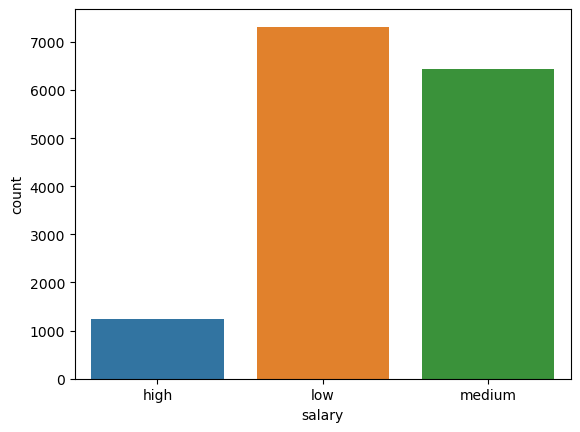

In [10]:
sns.countplot(data=df, x='salary')

<Axes: xlabel='number_project', ylabel='count'>

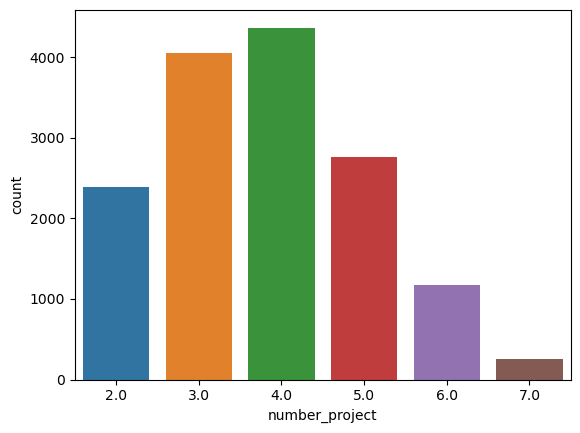

In [11]:
sns.countplot(data=df, x='number_project')

<Axes: xlabel='satisfaction_level', ylabel='Count'>

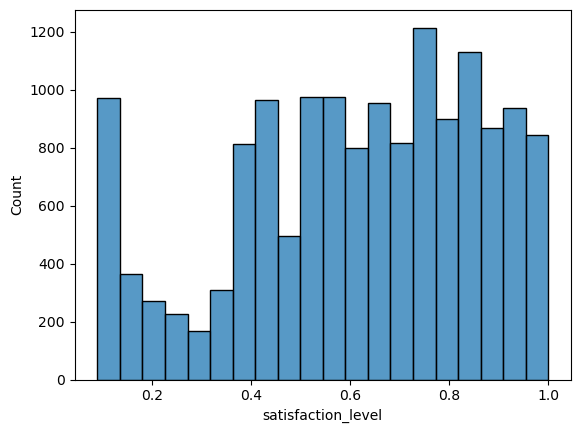

In [12]:
sns.histplot(data=df, x='satisfaction_level', bins=20)

#### Satisfaction Level is not normally distributed

### Defining Functions

In [13]:
#define the function call it ecdf and it take an argument data
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    #add a return statement that 
    return x, y

In [14]:
#define a function name it pearson_r that will take two arguments x and y
def pearson_corr_coef(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.cov((x, y))
    

    # Return entry [0,1]
    return corr_mat[0][1]

## Did those who have a work accident have bad performance results?

#### Boxplot for first Impression

<Axes: xlabel='Work_accident', ylabel='last_evaluation'>

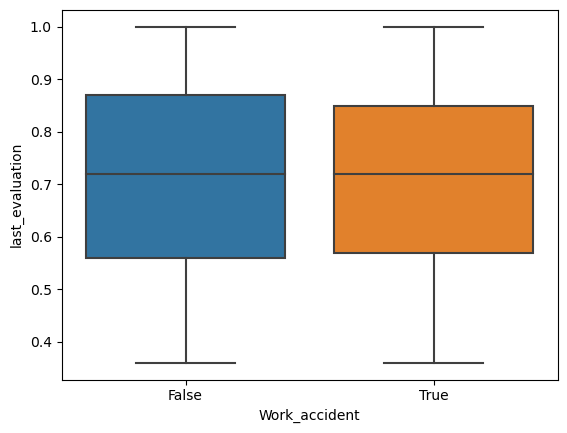

In [15]:
sns.boxplot(data=df, x='Work_accident', y='last_evaluation')

#### Hypothesis Testing

Null Hypothesis: Having a work accident does not affect evaluation results

Alternative Hypothesis: Having a work accident does affect evaluation results

In [16]:
df_wa = df[df['Work_accident']==1.0].copy()['last_evaluation']
df_no_wa = df[df['Work_accident']==0.0].copy()['last_evaluation']

ttest_val = stats.ttest_ind(df_wa, df_no_wa)
print("T-Test independent Value:", ttest_val[1])

T-Test independent Value: 0.38429846201039486


In [17]:
mannwhit_val = stats.mannwhitneyu(df_wa, df_no_wa)
print("Mann-Whitney U-rank Value:", mannwhit_val[1])

Mann-Whitney U-rank Value: 0.4800517584393518


P-value is greater than 0.05, therefore we do not reject the null hypothesis.

#### Having a work accident does not affect evaluation results.

## Does having a work accident influence job satisfaction?

#### ECDF for first impression

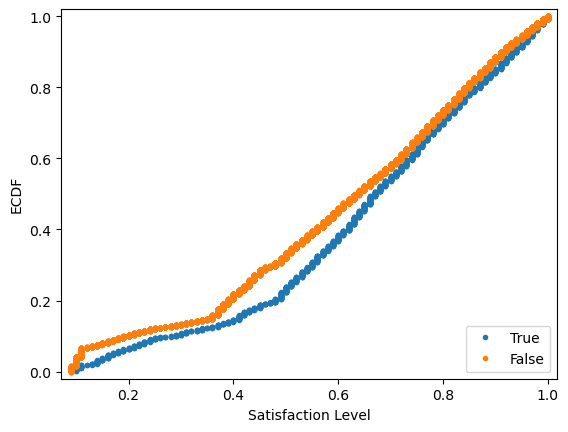

In [18]:
x_wa, y_wa = ecdf(df[df['Work_accident']==1.0].copy()['satisfaction_level'])
x_no_wa, y_no_wa = ecdf(df[df['Work_accident']==0.0].copy()['satisfaction_level'])


_ = plt.plot(x_wa, y_wa, marker = '.', linestyle = 'none')
_ = plt.plot(x_no_wa, y_no_wa, marker = '.', linestyle = 'none')


# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('True', 'False'), loc='lower right')
_ = plt.xlabel('Satisfaction Level')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

#### *It seems that having a work accident implies an INCREASE in satisfaction!* 

But is this increase significant enough for a true relation?

#### Hypothesis Testing

Null Hypothesis: Having a Work Accident does not affect satisfaction levels

Alternative Hypothesis: Having a Work Accident does affect satisfaction levels

In [19]:
df_wa = df[df['Work_accident']==1.0].copy()['satisfaction_level']
df_no_wa = df[df['Work_accident']==0.0].copy()['satisfaction_level']

ttest_val = stats.ttest_ind(df_wa, df_no_wa)
print("T-Test independent Value:", ttest_val[1])

T-Test independent Value: 6.27917991521948e-13


In [20]:
mannwhit_val = stats.mannwhitneyu(df_wa, df_no_wa)
print("Mann-Whitney U-rank Value:", mannwhit_val[1])

Mann-Whitney U-rank Value: 5.242907145393913e-12


P-value is below 0.05, therefore we reject the null hypothesis.

#### Having an Work Accident does affect (in fact, increase) satisfaction levels.

## Is there a correlation between Satisfaction Level and Work Performance?

#### Find Pearson Correlation Coefficient

In [21]:
sat_val = df['satisfaction_level']
perf_val = df['last_evaluation']

corr = pearson_corr_coef(sat_val, perf_val)
print('Pearson Correlation Coefficient: ', corr)

Pearson Correlation Coefficient:  0.004469481000471372


Pearson Correlation Coefficient mostly measures a linear relationship. Let's see if there is a different type of relationship visually.

#### Data Visualization: Jointplot

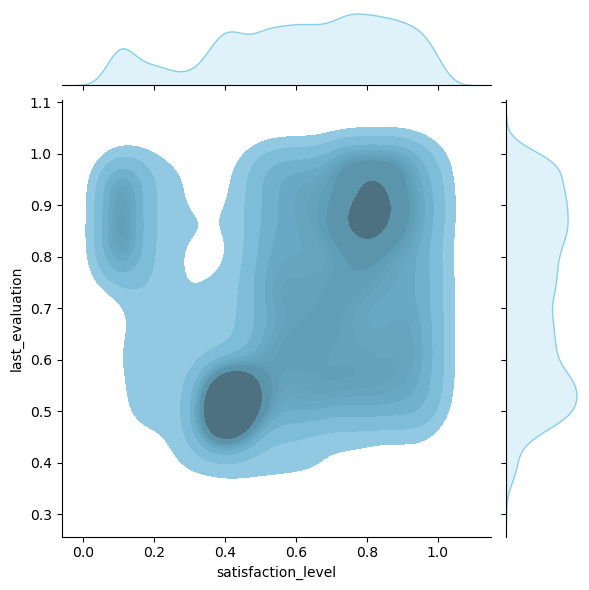

In [22]:
sns.jointplot(data=df, x='satisfaction_level', y='last_evaluation', kind='kde', color='skyblue', fill=True)

Rather than a strict relationship, there seems to be 3 major regions:
1. *0.8-1.0 evaluation score, but 0.0-0.2 satisfaction score*
2. *0.4-0.6 evaluation score, and 0.3-0.5 satisfaction score*
3. *0.8-1.0 evaluation score, and 0.7-0.9 satisfaction score*

## Is there a correlation between Satisfaction Level and average monthly hours?

#### Data Visualization: Jointplot

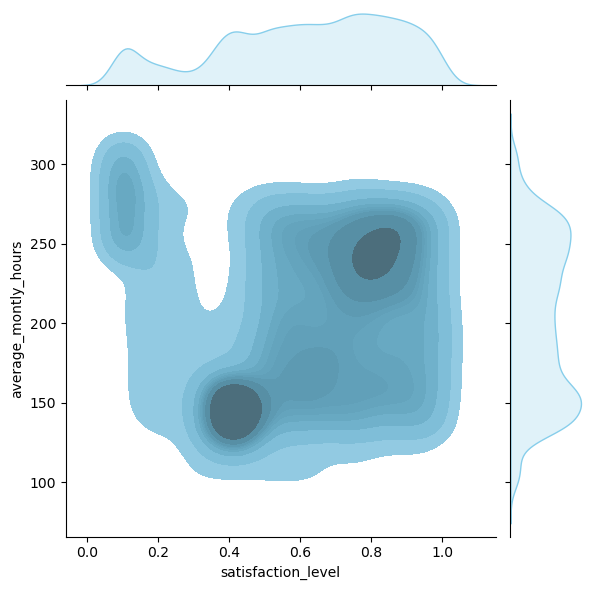

In [23]:
sns.jointplot(data=df, x='satisfaction_level', y='average_montly_hours', kind='kde', color='skyblue', fill=True)

Once more, we have 3 regions again. Note that the regions have the same satisfaction level ranges as the previous analysis.

#### Find Pearson Correlation Coefficient

In [24]:
mon_val = df['average_montly_hours']
sat_val = df['satisfaction_level']

corr = pearson_corr_coef(mon_val, sat_val)
print('Pearson Correlation Coefficient: ', corr)

Pearson Correlation Coefficient:  -0.2489451466387044


Low Linear Correlation

## Is there a correlation between Work Performance and average monthly hours?

Given the same shape came with both the evaluation score and the average monthly work hours, perhaps they are correlated in a mostly linear fashion?

#### Data Visualization: Jointplot

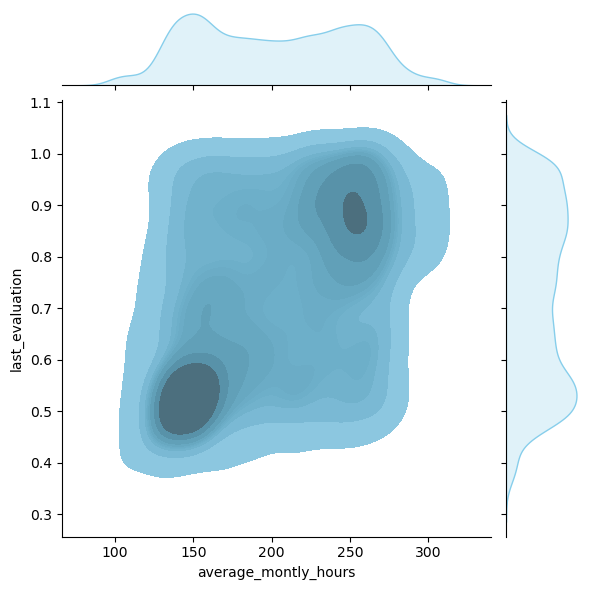

In [25]:
sns.jointplot(data=df, x='average_montly_hours', y='last_evaluation', kind='kde', color='skyblue', fill=True)

Hard to tell exactly, but there is no big regions outside the main diagonal

#### Pearson Correlation Coefficient

In [26]:
corr = pearson_corr_coef(mon_val, perf_val)
print('Pearson Correlation Coefficient: ', corr)

Pearson Correlation Coefficient:  2.904356126564371


Relatively High Correlation

## How does Satisfaction Level change with the Number of Concurrent Projects?

#### Data Visualization: Boxplot

<Axes: xlabel='number_project', ylabel='satisfaction_level'>

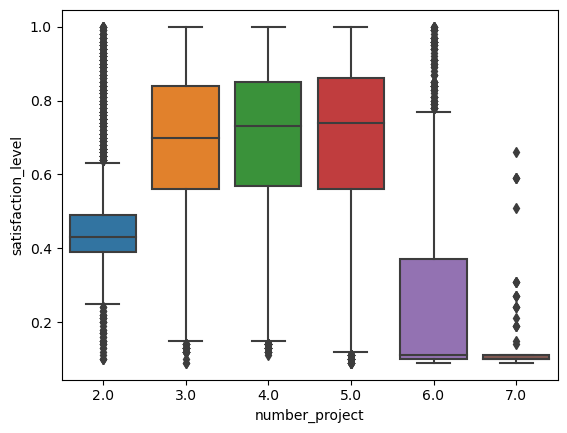

In [27]:
sns.boxplot(data=df, x='number_project',y='satisfaction_level')

Looks alright, but let's find out some more.

#### Data Visualization: ECDF

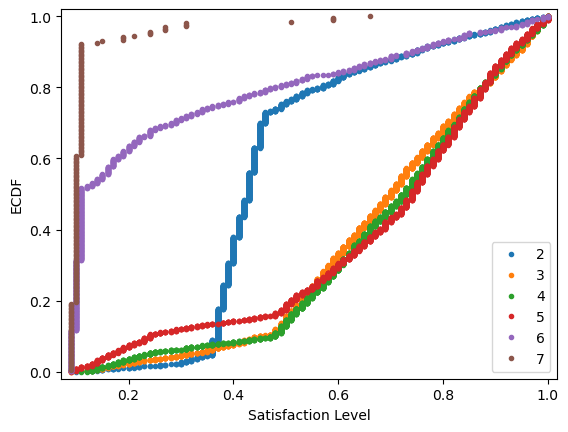

In [28]:
x_2, y_2 = ecdf(df[df['number_project']==2.0].copy()['satisfaction_level'])
x_3, y_3 = ecdf(df[df['number_project']==3.0].copy()['satisfaction_level'])
x_4, y_4 = ecdf(df[df['number_project']==4.0].copy()['satisfaction_level'])
x_5, y_5 = ecdf(df[df['number_project']==5.0].copy()['satisfaction_level'])
x_6, y_6 = ecdf(df[df['number_project']==6.0].copy()['satisfaction_level'])
x_7, y_7 = ecdf(df[df['number_project']==7.0].copy()['satisfaction_level'])

_ = plt.plot(x_2, y_2, marker = '.', linestyle = 'none')
_ = plt.plot(x_3, y_3, marker = '.', linestyle = 'none')
_ = plt.plot(x_4, y_4, marker = '.', linestyle = 'none')
_ = plt.plot(x_5, y_5, marker = '.', linestyle = 'none')
_ = plt.plot(x_6, y_6, marker = '.', linestyle = 'none')
_ = plt.plot(x_7, y_7, marker = '.', linestyle = 'none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('2', '3', '4', '5', '6', '7'), loc='lower right')
_ = plt.xlabel('Satisfaction Level')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

Conclusion: Having 3-5 projects seems to bring the most satisfaction. Having more seems to lower satisfaction levels. Surprisingly having only 2 projects brings lower satisfaction compared to 3-5.

## How does this relation change with regards to Seniority (Entry Level, Junior, Senior)?

#### Data Visualization: Heatmap

Need to use a Pivot Table

In [29]:
temp = df[['time_spend_company', 'number_project', 'satisfaction_level']]
temp.head()

,time_spend_company,number_project,satisfaction_level
Emp ID,,,
1.0,3.0,2.0,0.38
2.0,6.0,5.0,0.80
3.0,4.0,7.0,0.11
4.0,5.0,5.0,0.72
5.0,3.0,2.0,0.37


Include the Count Data as well

In [30]:
pivot_temp = temp.pivot_table(index='time_spend_company', columns='number_project', values='satisfaction_level', fill_value=0)
pivot_count_temp = temp.pivot_table(index='time_spend_company', columns='number_project', values='satisfaction_level', fill_value=0, aggfunc='count')

<Axes: xlabel='number_project', ylabel='time_spend_company'>

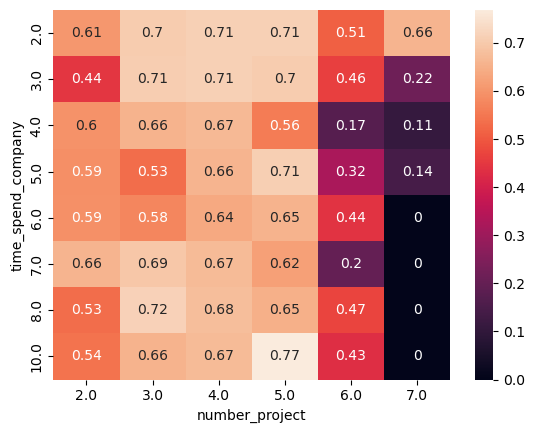

In [31]:
sns.heatmap(pivot_temp, annot=True)

<Axes: xlabel='number_project', ylabel='time_spend_company'>

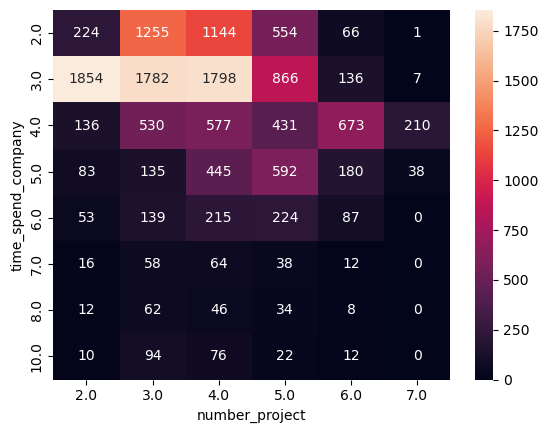

In [32]:
sns.heatmap(pivot_count_temp, annot=True, fmt='d')

Conclusion: It seems that most employees have been employed for less than 5 years. Not only that, but the satisfaction level seems to drop a tiny bit, but there are too few samples of employees of more than 5 years to draw strict conclusions.

## Does satisfaction levels change with Department and Job Type?

#### Data Visualization: ECDF

In [33]:
df.groupby('dept').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,salary
dept,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229


#### We want to divide by Job Types:
1. *Creative Problem Solving*
2. *Management*
3. *Customer Facing*

In [34]:
job_cat = {
    'IT': 'Prob_Sol',
    'RandD': 'Prob_Sol',
    'accounting': 'Manage',
    'hr': 'Manage',
    'management': 'Manage',
    'marketing': 'Prob_Sol',
    'product_mng': 'Manage',
    'sales': 'Cust_Serv',
    'support': 'Cust_Serv',
    'technical': 'Prob_Sol',
}

In [35]:
jobtype_df = df.copy()
jobtype_df['dept'] = jobtype_df['dept'].map(job_cat)
jobtype_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,dept,salary
Emp ID,,,,,,,,
1.0,0.38,0.53,2.0,157.0,3.0,False,Cust_Serv,low
2.0,0.80,0.86,5.0,262.0,6.0,False,Cust_Serv,medium
3.0,0.11,0.88,7.0,272.0,4.0,False,Cust_Serv,medium
4.0,0.72,0.87,5.0,223.0,5.0,False,Cust_Serv,low
5.0,0.37,0.52,2.0,159.0,3.0,False,Cust_Serv,low


In [36]:
jobtype_df.groupby('dept').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,salary
dept,,,,,,,
Cust_Serv,6369,6369,6369,6369,6369,6369,6369
Manage,3038,3038,3038,3038,3038,3038,3038
Prob_Sol,5592,5592,5592,5592,5592,5592,5592


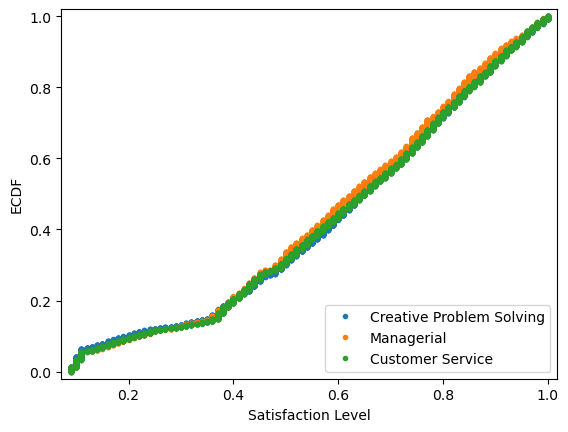

In [37]:
x_ps, y_ps = ecdf(jobtype_df[jobtype_df['dept'] == 'Prob_Sol']['satisfaction_level'])
x_ma, y_ma = ecdf(jobtype_df[jobtype_df['dept'] == 'Manage']['satisfaction_level'])
x_cs, y_cs = ecdf(jobtype_df[jobtype_df['dept'] == 'Cust_Serv']['satisfaction_level'])


# Plot all ECDFs on the same plot
_ = plt.plot(x_ps, y_ps, marker = '.', linestyle = 'none')
_ = plt.plot(x_ma, y_ma, marker = '.', linestyle = 'none')
_ = plt.plot(x_cs, y_cs, marker = '.', linestyle = 'none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('Creative Problem Solving', 'Managerial', 'Customer Service'), loc='lower right')
_ = plt.xlabel('Satisfaction Level')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

#### Hypothesis Testing

Null Hypothesis: Job Type has no influence on satisfaction levels.

Alternative Hypothesis: Job Type does have influence on satisfaction levels.

In [38]:
# split via salary levels
df_ps = jobtype_df[jobtype_df['dept'] == 'Prob_Sol']['satisfaction_level']
df_ma = jobtype_df[jobtype_df['dept'] == 'Manage']['satisfaction_level']
df_cs = jobtype_df[jobtype_df['dept'] == 'Cust_Serv']['satisfaction_level']

# Use ANOVA
anova_val = stats.f_oneway(df_ps, df_ma, df_cs)
print('ANOVA Value:', anova_val[1])

ANOVA Value: 0.16437463890981394


In [39]:
kruskal_val = stats.kruskal(df_ps, df_ma, df_cs)
print('Kruskal-Wallis H-test Value:', kruskal_val[1])

Kruskal-Wallis H-test Value: 0.06678838559710938


P-value is above 0.05, so we do not reject null hypothesis.

#### Job Type has no influence on satisfaction levels

## Which departments pay the most in general?

#### Data Visualization: Heatmap

In [40]:
dept_df = df[['dept', 'salary', 'average_montly_hours']] # average_montly_hours is just there for pivot table
pivot_dept_df = dept_df.pivot_table(index='dept', columns='salary', values='average_montly_hours', fill_value=0, aggfunc='count')
pivot_dept_df

salary,high,low,medium
dept,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Normalize to account for differences in department sizes.

In [41]:
normalize_pivot_dept = pivot_dept_df.div(pivot_dept_df.sum(axis=1), axis=0)
normalize_pivot_dept

salary,high,low,medium
dept,,,
IT,0.067645,0.496333,0.436023
RandD,0.064803,0.462516,0.472681
accounting,0.096480,0.466754,0.436767
hr,0.060893,0.453315,0.485792
management,0.357143,0.285714,0.357143
marketing,0.093240,0.468531,0.438228
product_mng,0.075388,0.500000,0.424612
sales,0.064976,0.507005,0.428019
support,0.063257,0.514132,0.422611


<Axes: xlabel='salary', ylabel='dept'>

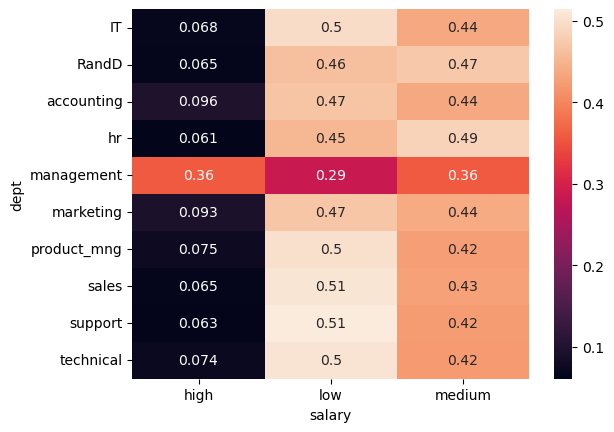

In [42]:
sns.heatmap(normalize_pivot_dept, annot=True)

#### Conclusion: Management seems to be paid the most overall.

## Do satisfaction levels differ between salary levels?

#### Data Visualization: KDEplot

<Axes: xlabel='satisfaction_level', ylabel='Density'>

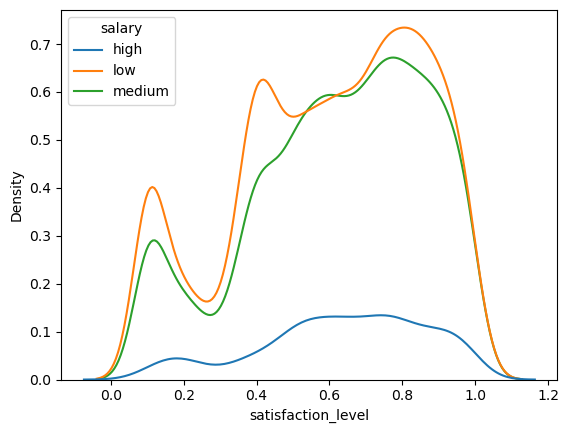

In [43]:
sns.kdeplot(data=df, x='satisfaction_level', hue='salary')

Although all three have a lot of people doing fine or enjoying their jobs, there seems to be a more drastic jump of people of low satisfaction among low and medium salary people.

#### Hypothesis Testing

Null Hypothesis: Salary Levels do not affect satisfaction level
Alternative Hypothesis: Salary levels do affect satisfaction Level

In [44]:
# split via salary levels
df_low_sal = df[df['salary']=='low'].copy()['satisfaction_level']
df_med_sal = df[df['salary']=='medium'].copy()['satisfaction_level']
df_high_sal = df[df['salary']=='high'].copy()['satisfaction_level']

# Use ANOVA
anova_val = stats.f_oneway(df_low_sal, df_med_sal, df_high_sal)
print('ANOVA Value:', anova_val[1])

ANOVA Value: 5.967355425747657e-09


In [45]:
kruskal_val = stats.kruskal(df_low_sal, df_med_sal, df_high_sal)
print('Kruskal-Wallis H-test Value:', kruskal_val[1])

Kruskal-Wallis H-test Value: 1.947690141323984e-07


P-value is below 0.05, therefore we reject the null hypothesis.

#### Salary levels do affect satisfaction level.